In [1]:
!pip install kagglehub

In [2]:
import kagglehub

# Download the dataset from Kaggle
path = kagglehub.dataset_download("kritikseth/fruit-and-vegetable-image-recognition")

# Print the dataset path
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8


In [3]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8"  # Update this path to the downloaded dataset
for root, dirs, files in os.walk(dataset_path):
    print(f"Directory: {root}")
    print(f"Subdirectories: {dirs}")
    print(f"Files: {files}")
    print("-" * 40)

Directory: /root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8
Subdirectories: ['validation', 'train', 'test']
Files: []
----------------------------------------
Directory: /root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8/validation
Subdirectories: ['sweetpotato', 'cucumber', 'eggplant', 'onion', 'peas', 'garlic', 'sweetcorn', 'lemon', 'carrot', 'pomegranate', 'watermelon', 'corn', 'pear', 'beetroot', 'grapes', 'orange', 'apple', 'jalepeno', 'potato', 'cabbage', 'turnip', 'pineapple', 'lettuce', 'raddish', 'soy beans', 'spinach', 'bell pepper', 'banana', 'mango', 'ginger', 'cauliflower', 'chilli pepper', 'capsicum', 'tomato', 'kiwi', 'paprika']
Files: []
----------------------------------------
Directory: /root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8/validation/sweetpotato
Subdirectories: []
Files: ['Image_7.jpg', 'Image_1.jpg', 'Image_5.jpg', 'Image_3.jpg', 

In [13]:
image_files = []
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(('.jpg', '.png', '.jpeg')):  # Add image extensions
            image_files.append(os.path.join(root, file))

# Display a few image paths
print("Sample image files:", image_files[:10])

Sample image files: ['/root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8/validation/sweetpotato/Image_7.jpg', '/root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8/validation/sweetpotato/Image_1.jpg', '/root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8/validation/sweetpotato/Image_5.jpg', '/root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8/validation/sweetpotato/Image_3.jpg', '/root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8/validation/sweetpotato/Image_2.jpg', '/root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8/validation/sweetpotato/Image_8.jpg', '/root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8/validation/sweetpotato/Image_4.jpg', '/root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image

In [4]:
image_files = os.listdir(dataset_path)
print(image_files[:10])  # Print the first 10 files

['validation', 'train', 'test']


In [5]:
import tensorflow as tf

batch_size = 32
img_height, img_width = 224, 224

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Optimize dataset performance
AUTOTUNE = tf.data.AUTOTUNE
train_data = train_data.prefetch(buffer_size=AUTOTUNE)
val_data = val_data.prefetch(buffer_size=AUTOTUNE)


Found 3825 files belonging to 3 classes.
Using 3060 files for training.
Found 3825 files belonging to 3 classes.
Using 765 files for validation.


In [6]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load Pre-trained ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False  # Freeze base model layers

# Add Custom Layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)  # Binary classification

model = Model(inputs=base_model.input, outputs=output)

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [7]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 96s 839ms/step - accuracy: 0.8067 - loss: 0.0337 - val_accuracy: 0.8261 - val_loss: 0.7749
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 125s 744ms/step - accuracy: 0.8112 - loss: -0.6010 - val_accuracy: 0.8261 - val_loss: 1.0582
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 89s 820ms/step - accuracy: 0.8132 - loss: -0.7228 - val_accuracy: 0.8261 - val_loss: 1.3827
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 81s 807ms/step - accuracy: 0.8157 - loss: -0.7349 - val_accuracy: 0.8261 - val_loss: 1.8951
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 84s 832ms/step - accuracy: 0.8189 - loss: -0.7909 - val_accuracy: 0.8261 - val_loss: 2.1826
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 81s 825ms/step - accuracy: 0.8143 - loss: -1.2010 - val_accuracy: 0.8261 - val_loss: 2.7168
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 82s 821ms/step - accuracy: 0.8123 - loss: -1.5828 - val_accuracy: 0.8261 - val_loss: 3.3317
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 83s 831ms/step - accuracy: 0.8116 - loss: -1.7798 - 

In [8]:
test_loss, test_accuracy = model.evaluate(val_data)
print(f"Validation Accuracy: {test_accuracy * 100:.2f}%")

24/24 ━━━━━━━━━━━━━━━━━━━━ 14s 599ms/step - accuracy: 0.8347 - loss: 4.5520
Validation Accuracy: 82.61%


In [9]:
model.save('fruit_vegetable_classifier.h5')


In [10]:
# Save the Model in Native Keras Format
model.save('fruit_vegetable_classifier.keras')

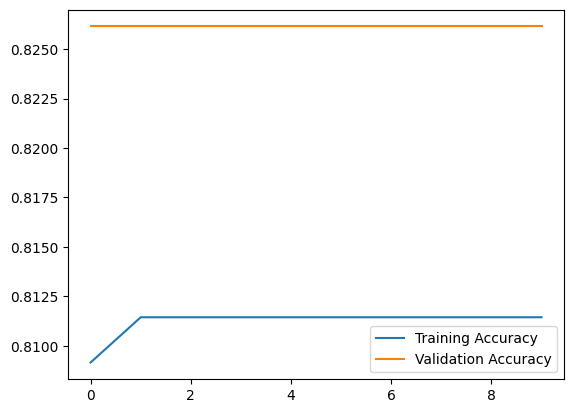

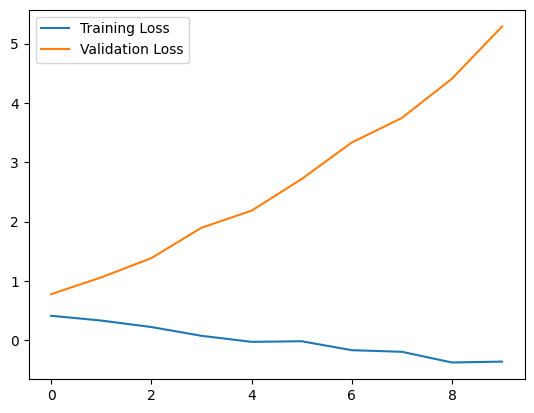

In [11]:
# Visualize Training Progress
import matplotlib.pyplot as plt

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [20]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess a single image
img = image.load_img('/root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8/train/tomato/Image_54.jpg', target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)
category = "Fruit" if prediction[0][0] < 0.5 else "Vegetable"
print(f"The image is classified as: {category}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The image is classified as: Vegetable
